In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

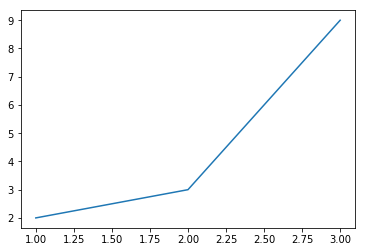

In [2]:
plt.plot([1,2,3],[2,3,9])

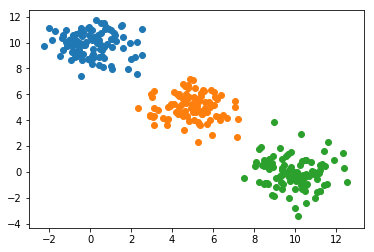

In [3]:
M = 2 # Dim of input data
K = 3 # Num of classes
n = 100 # Num of data in each classes
N = n*K # Total num of data in all classes

X1 = np.random.randn(n,M) + np.array([0,10])
X2 = np.random.randn(n,M) + np.array([5,5])
X3 = np.random.randn(n,M) + np.array([10,0])

Y1 = np.array([[1,0,0] for i in range(n)])
Y2 = np.array([[0,1,0] for i in range(n)])
Y3 = np.array([[0,0,1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])

In [4]:
# 모델
w = tf.Variable(tf.zeros([M,K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape = [None,M])

t = tf.placeholder(tf.float32, shape = [None,K])
y = tf.nn.softmax(tf.matmul(x,w)+b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices =[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correction_prediction = tf.equal(tf.argmax(y,1), tf.argmax(t,1))


In [5]:
# Session 열기
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


batch_size = 50
n_batches = N ## batch-size,

for epoch in range(20):
    X_, Y_ = shuffle (X,Y)
    for i in range(n_batches):
        start = i*batch_size
        end = start+batch_size
        
        sess.run(train_step, feed_dict = {
            x: X_[start:end],
            t: Y_[start:end]
        })

In [6]:
classified = correction_prediction.eval(session=sess, feed_dict = {
    x :X_[0:10],
    t :Y_[0:10]
})
prob = y.eval(session = sess, feed_dict={
    x:X_[0:10]
})

print("classified:")
print(classified)

print(prob)



classified:
[ True  True  True  True  True  True  True  True  True  True]
[[9.9836308e-01 1.6368702e-03 6.6047406e-10]
 [6.7755148e-09 3.0280996e-02 9.6971893e-01]
 [2.1395077e-09 4.6750833e-03 9.9532485e-01]
 [2.0773503e-01 7.9091477e-01 1.3502506e-03]
 [3.0546967e-09 4.4618095e-03 9.9553818e-01]
 [3.6076119e-03 9.6666270e-01 2.9729653e-02]
 [9.9745101e-01 2.5489621e-03 6.3097096e-09]
 [3.7493762e-02 9.6180785e-01 6.9835968e-04]
 [3.2254324e-11 5.6567666e-04 9.9943429e-01]
 [3.5447476e-09 2.5838518e-03 9.9741614e-01]]


In [7]:
Model = Sequential()
Model.add(Dense(input_dim=M, units=K))
Model.add(Activation("softmax"))

Model.compile(loss="categorical_crossentropy", optimizer=SGD(lr = 0.1))
b_size = 50
Model.fit(X,Y, epochs = 20, batch_size = b_size)

Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 1.2507
Epoch 2/20
300/300 [==============================] - 0s 67us/step - loss: 0.0968
Epoch 3/20
300/300 [==============================] - 0s 77us/step - loss: 0.0824
Epoch 4/20
300/300 [==============================] - 0s 53us/step - loss: 0.0761
Epoch 5/20
300/300 [==============================] - 0s 73us/step - loss: 0.0695
Epoch 6/20
300/300 [==============================] - 0s 73us/step - loss: 0.0633
Epoch 7/20
300/300 [==============================] - 0s 47us/step - loss: 0.0599
Epoch 8/20
300/300 [==============================] - 0s 57us/step - loss: 0.0564
Epoch 9/20
300/300 [==============================] - 0s 77us/step - loss: 0.0540
Epoch 10/20
300/300 [==============================] - 0s 53us/step - loss: 0.0514
Epoch 11/20
300/300 [==============================] - 0s 67us/step - loss: 0.0498
Epoch 12/20
300/300 [==============================] - 0s 77us/step - loss: 0.0477
Epoch 13/20
30

In [8]:
X_,Y_ = shuffle(X,Y)
classes = Model.predict_classes(X_[0:10], batch_size = b_size)
prob = Model.predict_proba(X_[0:10], batch_size = b_size)
print(prob)
print(np.argmax(Model.predict(X_[0:10]), axis =1) == classes)

[[4.8265197e-10 3.1538713e-03 9.9684614e-01]
 [4.2772531e-03 9.9260277e-01 3.1199811e-03]
 [9.9960607e-01 3.9391266e-04 7.3440733e-11]
 [3.0315872e-10 2.6623125e-03 9.9733764e-01]
 [1.0804065e-02 9.6683025e-01 2.2365730e-02]
 [5.6430083e-10 3.1199404e-03 9.9688005e-01]
 [9.5559262e-11 1.1254090e-03 9.9887460e-01]
 [9.8795903e-01 1.2040814e-02 1.0221240e-07]
 [1.6246275e-07 2.7856849e-02 9.7214293e-01]
 [6.7442963e-03 9.7802311e-01 1.5232482e-02]]
[ True  True  True  True  True  True  True  True  True  True]


In [3]:
# 정답
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

# 빈 깡통 - 입력, 정답층
x = tf.placeholder(tf.float32, shape = [None, 2], name='x')
t = tf.placeholder(tf.float32, shape = [None, 1], name='t')

# 은닉층 1
w = tf.Variable(tf.truncated_normal([2,2]), name='w')
b = tf.Variable(tf.zeros([2]), name='b')
h = tf.nn.sigmoid(tf.matmul(x,w) + b, name='h')

# 출력층
v = tf.Variable(tf.truncated_normal([2,1]), name = 'v')
c = tf.Variable(tf.zeros([1]), name = 'c')
y = tf.nn.sigmoid(tf.matmul(h,v) + c, name = 'y')

# 오차함수 (binary cross entropy)
cross_entropy = -tf.reduce_sum(t*tf.log(y) + (1-t)*tf.log(1-y))

# 학습방법 - gradient descent optimizer - minimize
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)),t)

In [4]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [5]:
for epoch in range(4000):
    sess.run(train_step, feed_dict = {
        x : X,
        t : Y
    })
    if epoch % 1000 == 0:
        print("epoch", epoch)

epoch 0
epoch 1000
epoch 2000
epoch 3000


In [6]:
classified = correct_prediction.eval(session = sess, feed_dict = {
    x : X,
    t : Y
})
prob = y.eval(session = sess, feed_dict = {
    x: X
})

print(classified)
print(prob)

[[ True]
 [ True]
 [ True]
 [ True]]
[[0.00974769]
 [0.9926023 ]
 [0.992477  ]
 [0.0084397 ]]


In [78]:
model = Sequential()
# 입력 - 은닉 1
model.add(Dense(input_dim = 2, units = 2))
model.add(Activation('sigmoid'))

#은닉 1 - 출력
model.add(Dense( units = 1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.1))
model.fit(X,Y, epochs = 8000, batch_size = 4)

Epoch 1/8000
4/4 [==============================] - 1s 188ms/step - loss: 0.7698
Epoch 2/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.7640
Epoch 3/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.7587
Epoch 4/8000
4/4 [==============================] - 0s 500us/step - loss: 0.7538
Epoch 5/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.7492
Epoch 6/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.7450
Epoch 7/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.7410
Epoch 8/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.7374
Epoch 9/8000
4/4 [==============================] - 0s 750us/step - loss: 0.7340
Epoch 10/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.7308
Epoch 11/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.7279
Epoch 12/8000
4/4 [==============================] - 0s 750us/step - loss: 0.7252
Epoch 13/8000
4/4 [======================

Epoch 102/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 103/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6913
Epoch 104/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6913
Epoch 105/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.6913
Epoch 106/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 107/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6913
Epoch 108/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6913
Epoch 109/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6913
Epoch 110/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 111/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6912
Epoch 112/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6912
Epoch 113/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6912
Epoch 

Epoch 202/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6907
Epoch 203/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6907
Epoch 204/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.6907
Epoch 205/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6907
Epoch 206/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6907
Epoch 207/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6907
Epoch 208/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.6907
Epoch 209/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6907
Epoch 210/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6906
Epoch 211/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6906
Epoch 212/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6906
Epoch 213/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6906
Epoch 2

Epoch 301/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.6900
Epoch 302/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6900
Epoch 303/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6900
Epoch 304/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6899
Epoch 305/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6899
Epoch 306/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6899
Epoch 307/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6899
Epoch 308/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6899
Epoch 309/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6899
Epoch 310/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6899
Epoch 311/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6899
Epoch 312/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6899
Epoch 31

Epoch 401/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6890
Epoch 402/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6890
Epoch 403/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6890
Epoch 404/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6890
Epoch 405/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6889
Epoch 406/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.6889
Epoch 407/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6889
Epoch 408/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.6889
Epoch 409/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6889
Epoch 410/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6889
Epoch 411/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6889
Epoch 412/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6889
Epoch

Epoch 500/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6877
Epoch 501/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6877
Epoch 502/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6877
Epoch 503/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6877
Epoch 504/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6877
Epoch 505/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6876
Epoch 506/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6876
Epoch 507/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6876
Epoch 508/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6876
Epoch 509/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6876
Epoch 510/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6876
Epoch 511/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6876
Epoch 512/

Epoch 600/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6860
Epoch 601/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6860
Epoch 602/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.6860
Epoch 603/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6859
Epoch 604/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6859
Epoch 605/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6859
Epoch 606/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6859
Epoch 607/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6859
Epoch 608/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6858
Epoch 609/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6858
Epoch 610/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6858
Epoch 611/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6858
Epoch 61

Epoch 700/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6837
Epoch 701/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6837
Epoch 702/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6837
Epoch 703/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6836
Epoch 704/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6836
Epoch 705/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6836
Epoch 706/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6836
Epoch 707/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6835
Epoch 708/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6835
Epoch 709/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6835
Epoch 710/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6835
Epoch 711/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6834
Epoch 71

Epoch 799/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.6808
Epoch 800/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6807
Epoch 801/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6807
Epoch 802/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6807
Epoch 803/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6806
Epoch 804/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6806
Epoch 805/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6806
Epoch 806/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6805
Epoch 807/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6805
Epoch 808/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6805
Epoch 809/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6804
Epoch 810/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6804
Epo

Epoch 898/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6769
Epoch 899/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6769
Epoch 900/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6769
Epoch 901/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6768
Epoch 902/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6768
Epoch 903/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6767
Epoch 904/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6767
Epoch 905/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6766
Epoch 906/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6766
Epoch 907/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6766
Epoch 908/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6765
Epoch 909/8000
4/4 [==============================] - 0s 3ms/step - loss: 0.6765
Epoch 91

Epoch 998/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6721
Epoch 999/8000
4/4 [==============================] - 0s 5ms/step - loss: 0.6720
Epoch 1000/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6720
Epoch 1001/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6719
Epoch 1002/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6719
Epoch 1003/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6718
Epoch 1004/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6718
Epoch 1005/8000
4/4 [==============================] - 0s 4ms/step - loss: 0.6717
Epoch 1006/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6716
Epoch 1007/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6716
Epoch 1008/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6715
Epoch 1009/8000
4/4 [==============================] - 0s 500us/step - loss: 0.671

Epoch 1096/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6662
Epoch 1097/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6661
Epoch 1098/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6660
Epoch 1099/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6660
Epoch 1100/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6659
Epoch 1101/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6658
Epoch 1102/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6658
Epoch 1103/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6657
Epoch 1104/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6656
Epoch 1105/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6656
Epoch 1106/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6655
Epoch 1107/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6

Epoch 1194/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6590
Epoch 1195/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6590
Epoch 1196/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6589
Epoch 1197/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6588
Epoch 1198/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6587
Epoch 1199/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 1200/8000
4/4 [==============================] - 0s 4ms/step - loss: 0.6586
Epoch 1201/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6585
Epoch 1202/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6584
Epoch 1203/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6583
Epoch 1204/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.6582
Epoch 1205/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6582

Epoch 1292/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6506
Epoch 1293/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6505
Epoch 1294/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6504
Epoch 1295/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6503
Epoch 1296/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6502
Epoch 1297/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6501
Epoch 1298/8000
4/4 [==============================] - 0s 3ms/step - loss: 0.6500
Epoch 1299/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6499
Epoch 1300/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6498
Epoch 1301/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6497
Epoch 1302/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6497
Epoch 1303/8000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 1390/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6408
Epoch 1391/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6407
Epoch 1392/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6406
Epoch 1393/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6405
Epoch 1394/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6404
Epoch 1395/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6403
Epoch 1396/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6402
Epoch 1397/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6401
Epoch 1398/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.6399
Epoch 1399/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6398
Epoch 1400/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6397
Epoch 1401/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6396

Epoch 1488/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6298
Epoch 1489/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6297
Epoch 1490/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6295
Epoch 1491/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6294
Epoch 1492/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6293
Epoch 1493/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6292
Epoch 1494/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6291
Epoch 1495/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6289
Epoch 1496/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6288
Epoch 1497/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6287
Epoch 1498/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.6286
Epoch 1499/8000
4/4 [==============================] - 0s 750us/step - loss: 

Epoch 1586/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6177
Epoch 1587/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6176
Epoch 1588/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6175
Epoch 1589/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6173
Epoch 1590/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6172
Epoch 1591/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6171
Epoch 1592/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6170
Epoch 1593/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6168
Epoch 1594/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6167
Epoch 1595/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6166
Epoch 1596/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6165
Epoch 1597/8000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 1684/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6050
Epoch 1685/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6049
Epoch 1686/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6047
Epoch 1687/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.6046
Epoch 1688/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6045
Epoch 1689/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.6043
Epoch 1690/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6042
Epoch 1691/8000
4/4 [==============================] - 0s 3ms/step - loss: 0.6041
Epoch 1692/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6039
Epoch 1693/8000
4/4 [==============================] - 0s 4ms/step - loss: 0.6038
Epoch 1694/8000
4/4 [==============================] - 0s 500us/step - loss: 0.6037
Epoch 1695/8000
4/4 [==============================] - 0s 750us/step - loss: 0.6035


Epoch 1782/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5919
Epoch 1783/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5918
Epoch 1784/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5917
Epoch 1785/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5915
Epoch 1786/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5914
Epoch 1787/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5913
Epoch 1788/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5911
Epoch 1789/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5910
Epoch 1790/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5909
Epoch 1791/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5907
Epoch 1792/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5906
Epoch 1793/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5

Epoch 1880/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5789
Epoch 1881/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5788
Epoch 1882/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5787
Epoch 1883/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5785
Epoch 1884/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5784
Epoch 1885/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5783
Epoch 1886/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5782
Epoch 1887/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5780
Epoch 1888/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5779
Epoch 1889/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5778
Epoch 1890/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5776
Epoch 1891/8000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 1978/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5662
Epoch 1979/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5661
Epoch 1980/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5660
Epoch 1981/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5658
Epoch 1982/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5657
Epoch 1983/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5656
Epoch 1984/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5655
Epoch 1985/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5653
Epoch 1986/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5652
Epoch 1987/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5651
Epoch 1988/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5649
Epoch 1989/8000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 2076/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5539
Epoch 2077/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5538
Epoch 2078/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5537
Epoch 2079/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5535
Epoch 2080/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5534
Epoch 2081/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5533
Epoch 2082/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5532
Epoch 2083/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5530
Epoch 2084/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5529
Epoch 2085/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5528
Epoch 2086/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5527
Epoch 2087/8000
4/4 [==============================] - 0s 750us/step - loss: 0.552

Epoch 2174/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5420
Epoch 2175/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5419
Epoch 2176/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5418
Epoch 2177/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5416
Epoch 2178/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5415
Epoch 2179/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5414
Epoch 2180/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5413
Epoch 2181/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5412
Epoch 2182/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5410
Epoch 2183/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5409
Epoch 2184/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5408
Epoch 2185/8000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 2272/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5303
Epoch 2273/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5302
Epoch 2274/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5301
Epoch 2275/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5300
Epoch 2276/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5299
Epoch 2277/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 2278/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5296
Epoch 2279/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5295
Epoch 2280/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5294
Epoch 2281/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5293
Epoch 2282/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5292
Epoch 2283/8000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 2370/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5188
Epoch 2371/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5187
Epoch 2372/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5185
Epoch 2373/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5184
Epoch 2374/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5183
Epoch 2375/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5182
Epoch 2376/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5181
Epoch 2377/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5179
Epoch 2378/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5178
Epoch 2379/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5177
Epoch 2380/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5176
Epoch 2381/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5

Epoch 2468/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5070
Epoch 2469/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5068
Epoch 2470/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5067
Epoch 2471/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5066
Epoch 2472/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5065
Epoch 2473/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5063
Epoch 2474/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5062
Epoch 2475/8000
4/4 [==============================] - 0s 500us/step - loss: 0.5061
Epoch 2476/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5060
Epoch 2477/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5058
Epoch 2478/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.5057
Epoch 2479/8000
4/4 [==============================] - 0s 750us/step - loss: 0.5

Epoch 2566/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4945
Epoch 2567/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4944
Epoch 2568/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.4942
Epoch 2569/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4941
Epoch 2570/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.4940
Epoch 2571/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4938
Epoch 2572/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4937
Epoch 2573/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.4936
Epoch 2574/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.4934
Epoch 2575/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4933
Epoch 2576/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.4932
Epoch 2577/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.4930
Epoc

Epoch 2664/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4808
Epoch 2665/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4807
Epoch 2666/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4805
Epoch 2667/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4804
Epoch 2668/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4802
Epoch 2669/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4801
Epoch 2670/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4799
Epoch 2671/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4798
Epoch 2672/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4796
Epoch 2673/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4795
Epoch 2674/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.4793
Epoch 2675/8000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 2762/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4652
Epoch 2763/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4650
Epoch 2764/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4649
Epoch 2765/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4647
Epoch 2766/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4645
Epoch 2767/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4644
Epoch 2768/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4642
Epoch 2769/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4640
Epoch 2770/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4638
Epoch 2771/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4637
Epoch 2772/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4635
Epoch 2773/8000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 2860/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4469
Epoch 2861/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4467
Epoch 2862/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4465
Epoch 2863/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4463
Epoch 2864/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4461
Epoch 2865/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4459
Epoch 2866/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4457
Epoch 2867/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.4455
Epoch 2868/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.4452
Epoch 2869/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4450
Epoch 2870/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4448
Epoch 2871/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4

Epoch 2958/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4252
Epoch 2959/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4249
Epoch 2960/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.4247
Epoch 2961/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4245
Epoch 2962/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4242
Epoch 2963/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4240
Epoch 2964/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4237
Epoch 2965/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4235
Epoch 2966/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4232
Epoch 2967/8000
4/4 [==============================] - 0s 500us/step - loss: 0.4230
Epoch 2968/8000
4/4 [==============================] - 0s 750us/step - loss: 0.4228
Epoch 2969/8000
4/4 [==============================] - 0s 500us/step - loss

Epoch 3056/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3999
Epoch 3057/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3997
Epoch 3058/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3994
Epoch 3059/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3991
Epoch 3060/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3988
Epoch 3061/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3986
Epoch 3062/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.3983
Epoch 3063/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3980
Epoch 3064/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3977
Epoch 3065/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3974
Epoch 3066/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3972
Epoch 3067/8000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 3154/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3717
Epoch 3155/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3714
Epoch 3156/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3711
Epoch 3157/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3708
Epoch 3158/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3705
Epoch 3159/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3702
Epoch 3160/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3699
Epoch 3161/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3696
Epoch 3162/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3693
Epoch 3163/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3690
Epoch 3164/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3687
Epoch 3165/8000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 3252/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.3415
Epoch 3253/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3412
Epoch 3254/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3409
Epoch 3255/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3406
Epoch 3256/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3403
Epoch 3257/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3399
Epoch 3258/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3396
Epoch 3259/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3393
Epoch 3260/8000
4/4 [==============================] - 0s 4ms/step - loss: 0.3390
Epoch 3261/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.3387
Epoch 3262/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3384
Epoch 3263/8000
4/4 [==============================] - 0s 750us/step - loss: 0.338

Epoch 3350/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3107
Epoch 3351/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3104
Epoch 3352/8000
4/4 [==============================] - 0s 3ms/step - loss: 0.3101
Epoch 3353/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3098
Epoch 3354/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3094
Epoch 3355/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3091
Epoch 3356/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3088
Epoch 3357/8000
4/4 [==============================] - 0s 500us/step - loss: 0.3085
Epoch 3358/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3082
Epoch 3359/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3079
Epoch 3360/8000
4/4 [==============================] - 0s 750us/step - loss: 0.3076
Epoch 3361/8000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 3448/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2805
Epoch 3449/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2802
Epoch 3450/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2799
Epoch 3451/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2796
Epoch 3452/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2793
Epoch 3453/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2790
Epoch 3454/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2787
Epoch 3455/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2784
Epoch 3456/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2781
Epoch 3457/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2778
Epoch 3458/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2775
Epoch 3459/8000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 3546/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.2520
Epoch 3547/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2517
Epoch 3548/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2514
Epoch 3549/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2512
Epoch 3550/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2509
Epoch 3551/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2506
Epoch 3552/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2503
Epoch 3553/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2500
Epoch 3554/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2498
Epoch 3555/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2495
Epoch 3556/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2492
Epoch 3557/8000
4/4 [==============================] - 0s 500us/step - loss

Epoch 3644/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2259
Epoch 3645/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2256
Epoch 3646/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2254
Epoch 3647/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2251
Epoch 3648/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2249
Epoch 3649/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2246
Epoch 3650/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2244
Epoch 3651/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2241
Epoch 3652/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2239
Epoch 3653/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2236
Epoch 3654/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.2234
Epoch 3655/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.2

Epoch 3742/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2025
Epoch 3743/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2023
Epoch 3744/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2021
Epoch 3745/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2019
Epoch 3746/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2016
Epoch 3747/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2014
Epoch 3748/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2012
Epoch 3749/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2010
Epoch 3750/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2008
Epoch 3751/8000
4/4 [==============================] - 0s 500us/step - loss: 0.2005
Epoch 3752/8000
4/4 [==============================] - 0s 750us/step - loss: 0.2003
Epoch 3753/8000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 3840/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1820
Epoch 3841/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1818
Epoch 3842/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.1816
Epoch 3843/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1814
Epoch 3844/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 3845/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 3846/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1808
Epoch 3847/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1806
Epoch 3848/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1804
Epoch 3849/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1803
Epoch 3850/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1801
Epoch 3851/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1799


Epoch 3939/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 3940/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 3941/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1636
Epoch 3942/8000
4/4 [==============================] - 0s 3ms/step - loss: 0.1634
Epoch 3943/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1633
Epoch 3944/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1631
Epoch 3945/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1629
Epoch 3946/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1628
Epoch 3947/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1626
Epoch 3948/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1624
Epoch 3949/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1623
Epoch 3950/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1621


Epoch 4037/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1484
Epoch 4038/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1483
Epoch 4039/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1482
Epoch 4040/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1480
Epoch 4041/8000
4/4 [==============================] - 0s 7ms/step - loss: 0.1479
Epoch 4042/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1477
Epoch 4043/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1476
Epoch 4044/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1474
Epoch 4045/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1473
Epoch 4046/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1471
Epoch 4047/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1470
Epoch 4048/8000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 4135/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1350
Epoch 4136/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1349
Epoch 4137/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1348
Epoch 4138/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1347
Epoch 4139/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.1345
Epoch 4140/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1344
Epoch 4141/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1343
Epoch 4142/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1342
Epoch 4143/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1340
Epoch 4144/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1339
Epoch 4145/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1338
Epoch 4146/8000
4/4 [==============================] - 0s 750us/step - loss: 0.133

Epoch 4233/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1234
Epoch 4234/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1233
Epoch 4235/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1232
Epoch 4236/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1231
Epoch 4237/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1230
Epoch 4238/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1229
Epoch 4239/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1228
Epoch 4240/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1227
Epoch 4241/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1225
Epoch 4242/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1224
Epoch 4243/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1223
Epoch 4244/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1

Epoch 4331/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1133
Epoch 4332/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1132
Epoch 4333/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1131
Epoch 4334/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1130
Epoch 4335/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1130
Epoch 4336/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1129
Epoch 4337/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1128
Epoch 4338/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1127
Epoch 4339/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1126
Epoch 4340/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1125
Epoch 4341/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1124
Epoch 4342/8000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 4429/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1045
Epoch 4430/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1044
Epoch 4431/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1044
Epoch 4432/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1043
Epoch 4433/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1042
Epoch 4434/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1041
Epoch 4435/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.1040
Epoch 4436/8000
4/4 [==============================] - 0s 500us/step - loss: 0.1039
Epoch 4437/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1039
Epoch 4438/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.1038
Epoch 4439/8000
4/4 [==============================] - 0s 750us/step - loss: 0.1037
Epoch 4440/8000
4/4 [==============================] - 0s 750us/step - loss: 

Epoch 4527/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0968
Epoch 4528/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0967
Epoch 4529/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0967
Epoch 4530/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0966
Epoch 4531/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0965
Epoch 4532/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0965
Epoch 4533/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0964
Epoch 4534/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0963
Epoch 4535/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0962
Epoch 4536/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0962
Epoch 4537/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0961
Epoch 4538/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0

Epoch 4625/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0900
Epoch 4626/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0900
Epoch 4627/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0899
Epoch 4628/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0898
Epoch 4629/8000
4/4 [==============================] - 0s 4ms/step - loss: 0.0898
Epoch 4630/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0897
Epoch 4631/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0896
Epoch 4632/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0896
Epoch 4633/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0895
Epoch 4634/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0894
Epoch 4635/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0894
Epoch 4636/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0

Epoch 4724/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0840
Epoch 4725/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0839
Epoch 4726/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0839
Epoch 4727/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0838
Epoch 4728/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0837
Epoch 4729/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0837
Epoch 4730/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0836
Epoch 4731/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0836
Epoch 4732/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0835
Epoch 4733/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0835
Epoch 4734/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0834
Epoch 4735/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0833


Epoch 4823/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0786
Epoch 4824/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0785
Epoch 4825/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0785
Epoch 4826/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0784
Epoch 4827/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0784
Epoch 4828/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0783
Epoch 4829/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0783
Epoch 4830/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0782
Epoch 4831/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0782
Epoch 4832/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0781
Epoch 4833/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0781
Epoch 4834/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0780


Epoch 4922/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0738
Epoch 4923/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0737
Epoch 4924/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0737
Epoch 4925/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0737
Epoch 4926/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0736
Epoch 4927/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0736
Epoch 4928/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0735
Epoch 4929/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0735
Epoch 4930/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0734
Epoch 4931/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 4932/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0733
Epoch 4933/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0

Epoch 5021/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0695
Epoch 5022/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0694
Epoch 5023/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0694
Epoch 5024/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0694
Epoch 5025/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0693
Epoch 5026/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0693
Epoch 5027/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0692
Epoch 5028/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0692
Epoch 5029/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0692
Epoch 5030/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.0691
Epoch 5031/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 5032/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0690
E

Epoch 5120/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0656
Epoch 5121/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0656
Epoch 5122/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0655
Epoch 5123/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0655
Epoch 5124/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0655
Epoch 5125/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0654
Epoch 5126/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0654
Epoch 5127/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0654
Epoch 5128/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0653
Epoch 5129/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0653
Epoch 5130/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0653
Epoch 5131/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0652
Epoch 

Epoch 5219/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0621
Epoch 5220/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 5221/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0621
Epoch 5222/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0620
Epoch 5223/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0620
Epoch 5224/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0620
Epoch 5225/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0619
Epoch 5226/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.0619
Epoch 5227/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0619
Epoch 5228/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0618
Epoch 5229/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0618
Epoch 5230/8000
4/4 [==============================] - 0s 750us/step - loss: 0.

Epoch 5318/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0590
Epoch 5319/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0589
Epoch 5320/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0589
Epoch 5321/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0589
Epoch 5322/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0588
Epoch 5323/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0588
Epoch 5324/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0588
Epoch 5325/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0587
Epoch 5326/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0587
Epoch 5327/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0587
Epoch 5328/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0587
Epoch 5329/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0586
Ep

Epoch 5417/8000
4/4 [==============================] - 0s 3ms/step - loss: 0.0561
Epoch 5418/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0560
Epoch 5419/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0560
Epoch 5420/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0560
Epoch 5421/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0560
Epoch 5422/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0559
Epoch 5423/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0559
Epoch 5424/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0559
Epoch 5425/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0558
Epoch 5426/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0558
Epoch 5427/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0558
Epoch 5428/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0558


Epoch 5516/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0534
Epoch 5517/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0534
Epoch 5518/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0534
Epoch 5519/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0534
Epoch 5520/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0533
Epoch 5521/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0533
Epoch 5522/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0533
Epoch 5523/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0533
Epoch 5524/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 5525/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0532
Epoch 5526/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.0532
Epoch 5527/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0532

Epoch 5615/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0510
Epoch 5616/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0510
Epoch 5617/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0510
Epoch 5618/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0509
Epoch 5619/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0509
Epoch 5620/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0509
Epoch 5621/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0509
Epoch 5622/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0509
Epoch 5623/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 5624/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 5625/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 5626/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0508


Epoch 5714/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0488
Epoch 5715/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0488
Epoch 5716/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0488
Epoch 5717/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0487
Epoch 5718/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 5719/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0487
Epoch 5720/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0487
Epoch 5721/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0486
Epoch 5722/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0486
Epoch 5723/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0486
Epoch 5724/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 5725/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0

Epoch 5812/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0468
Epoch 5813/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0467
Epoch 5814/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0467
Epoch 5815/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0467
Epoch 5816/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0467
Epoch 5817/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0467
Epoch 5818/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0466
Epoch 5819/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0466
Epoch 5820/8000
4/4 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 5821/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0466
Epoch 5822/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0466
Epoch 5823/8000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 5910/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0449
Epoch 5911/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0449
Epoch 5912/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0449
Epoch 5913/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0448
Epoch 5914/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0448
Epoch 5915/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0448
Epoch 5916/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 5917/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0448
Epoch 5918/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0447
Epoch 5919/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0447
Epoch 5920/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0447
Epoch 5921/8000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 6008/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0431
Epoch 6009/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0431
Epoch 6010/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0431
Epoch 6011/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0431
Epoch 6012/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0431
Epoch 6013/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0431
Epoch 6014/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0430
Epoch 6015/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0430
Epoch 6016/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0430
Epoch 6017/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0430
Epoch 6018/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0430
Epoch 6019/8000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 6106/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0415
Epoch 6107/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0415
Epoch 6108/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0415
Epoch 6109/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0415
Epoch 6110/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0415
Epoch 6111/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0415
Epoch 6112/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0414
Epoch 6113/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0414
Epoch 6114/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0414
Epoch 6115/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0414
Epoch 6116/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0414
Epoch 6117/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.041

Epoch 6205/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0400
Epoch 6206/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0400
Epoch 6207/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0400
Epoch 6208/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0400
Epoch 6209/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0399
Epoch 6210/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0399
Epoch 6211/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0399
Epoch 6212/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.0399
Epoch 6213/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0399
Epoch 6214/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0399
Epoch 6215/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0399
Epoch 6216/8000
4/4 [==============================] - 0s 750us/step - loss: 

Epoch 6303/8000
4/4 [==============================] - 0s 6ms/step - loss: 0.0386
Epoch 6304/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 6305/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0386
Epoch 6306/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 6307/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0385
Epoch 6308/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.0385
Epoch 6309/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0385
Epoch 6310/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0385
Epoch 6311/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0385
Epoch 6312/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0385
Epoch 6313/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0385
Epoch 6314/8000
4/4 [==============================] - 0s 500us/step - loss: 0.03

Epoch 6402/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0373
Epoch 6403/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0373
Epoch 6404/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0372
Epoch 6405/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0372
Epoch 6406/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0372
Epoch 6407/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0372
Epoch 6408/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0372
Epoch 6409/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0372
Epoch 6410/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 6411/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0372
Epoch 6412/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0371
Epoch 6413/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 6500/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0360
Epoch 6501/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0360
Epoch 6502/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0360
Epoch 6503/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0360
Epoch 6504/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 6505/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0360
Epoch 6506/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0360
Epoch 6507/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0360
Epoch 6508/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0359
Epoch 6509/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0359
Epoch 6510/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0359
Epoch 6511/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 6598/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0349
Epoch 6599/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0349
Epoch 6600/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0349
Epoch 6601/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0348
Epoch 6602/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 6603/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0348
Epoch 6604/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0348
Epoch 6605/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0348
Epoch 6606/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0348
Epoch 6607/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0348
Epoch 6608/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0348
Epoch 6609/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0

Epoch 6696/8000
4/4 [==============================] - 0s 6ms/step - loss: 0.0338
Epoch 6697/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 6698/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0338
Epoch 6699/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0338
Epoch 6700/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0337
Epoch 6701/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0337
Epoch 6702/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0337
Epoch 6703/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0337
Epoch 6704/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0337
Epoch 6705/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0337
Epoch 6706/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 6707/8000
4/4 [==============================] - 0s 750us/step - loss: 0.033

Epoch 6794/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0328
Epoch 6795/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0327
Epoch 6796/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0327
Epoch 6797/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0327
Epoch 6798/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 6799/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0327
Epoch 6800/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0327
Epoch 6801/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0327
Epoch 6802/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0327
Epoch 6803/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 6804/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0327
Epoch 6805/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0

Epoch 6892/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0318
Epoch 6893/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0318
Epoch 6894/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0318
Epoch 6895/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0318
Epoch 6896/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0318
Epoch 6897/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0317
Epoch 6898/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0317
Epoch 6899/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0317
Epoch 6900/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0317
Epoch 6901/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0317
Epoch 6902/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0317
Epoch 6903/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0

Epoch 6990/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0309
Epoch 6991/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0309
Epoch 6992/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0309
Epoch 6993/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0308
Epoch 6994/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 6995/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0308
Epoch 6996/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0308
Epoch 6997/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0308
Epoch 6998/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0308
Epoch 6999/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0308
Epoch 7000/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0308
Epoch 7001/8000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 7088/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0300
Epoch 7089/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0300
Epoch 7090/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0300
Epoch 7091/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 7092/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0300
Epoch 7093/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0300
Epoch 7094/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0300
Epoch 7095/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0299
Epoch 7096/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 7097/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0299
Epoch 7098/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0299
Epoch 7099/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0299


Epoch 7186/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0292
Epoch 7187/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0292
Epoch 7188/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0292
Epoch 7189/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0292
Epoch 7190/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0292
Epoch 7191/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 7192/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0291
Epoch 7193/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 7194/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 7195/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 7196/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0291
Epoch 7197/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0291
Ep

Epoch 7284/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0284
Epoch 7285/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0284
Epoch 7286/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0284
Epoch 7287/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0284
Epoch 7288/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0284
Epoch 7289/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0284
Epoch 7290/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0284
Epoch 7291/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0284
Epoch 7292/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0283
Epoch 7293/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 7294/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0283
Epoch 7295/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0

Epoch 7382/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0277
Epoch 7383/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0277
Epoch 7384/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 7385/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0276
Epoch 7386/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0276
Epoch 7387/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 7388/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 7389/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0276
Epoch 7390/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0276
Epoch 7391/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 7392/8000
4/4 [==============================] - 0s 1000us/step - loss: 0.0276
Epoch 7393/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0276
E

Epoch 7480/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 7481/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0270
Epoch 7482/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0269
Epoch 7483/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0269
Epoch 7484/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0269
Epoch 7485/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0269
Epoch 7486/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0269
Epoch 7487/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0269
Epoch 7488/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0269
Epoch 7489/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0269
Epoch 7490/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0269
Epoch 7491/8000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 7578/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0263
Epoch 7579/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0263
Epoch 7580/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0263
Epoch 7581/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 7582/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0263
Epoch 7583/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0263
Epoch 7584/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 7585/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0262
Epoch 7586/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0262
Epoch 7587/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0262
Epoch 7588/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0262
Epoch 7589/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0

Epoch 7676/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0256
Epoch 7677/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0256
Epoch 7678/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0256
Epoch 7679/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 7680/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0256
Epoch 7681/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0256
Epoch 7682/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0256
Epoch 7683/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0256
Epoch 7684/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0256
Epoch 7685/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0256
Epoch 7686/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 7687/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.025

Epoch 7774/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0250
Epoch 7775/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0250
Epoch 7776/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0250
Epoch 7777/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 7778/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0250
Epoch 7779/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0250
Epoch 7780/8000
4/4 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 7781/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0250
Epoch 7782/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0250
Epoch 7783/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0250
Epoch 7784/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0250
Epoch 7785/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0

Epoch 7872/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0245
Epoch 7873/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0244
Epoch 7874/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0244
Epoch 7875/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0244
Epoch 7876/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0244
Epoch 7877/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0244
Epoch 7878/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 7879/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0244
Epoch 7880/8000
4/4 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 7881/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0244
Epoch 7882/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0244
Epoch 7883/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0

Epoch 7970/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0239
Epoch 7971/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0239
Epoch 7972/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0239
Epoch 7973/8000
4/4 [==============================] - 0s 4ms/step - loss: 0.0239
Epoch 7974/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0239
Epoch 7975/8000
4/4 [==============================] - 0s 500us/step - loss: 0.0239
Epoch 7976/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0239
Epoch 7977/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0239
Epoch 7978/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0238
Epoch 7979/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0238
Epoch 7980/8000
4/4 [==============================] - 0s 750us/step - loss: 0.0238
Epoch 7981/8000
4/4 [==============================] - 0s 1ms/step - loss: 0.0

In [79]:
classes = model.predict_classes(X, batch_size = 4)
prob = model.predict_proba(X, batch_size = 4)

print(Y ==classes)
print(prob)

[[ True]
 [ True]
 [ True]
 [ True]]
[[0.01823494]
 [0.9745521 ]
 [0.97446114]
 [0.02453247]]
